In [1]:
%run './model/multi_corpus.py'
%run './constants.py'

from matplotlib import cm

In [2]:
corpora = citation_graphs()
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies DiGraph with 4498 nodes and 10516 edges
Geometry DiGraph with 5513 nodes and 7766 edges
Geophysics DiGraph with 51481 nodes and 222792 edges
Economics DiGraph with 9092 nodes and 77939 edges
Language & Linguistics DiGraph with 4352 nodes and 21175 edges
Probability & Statistics DiGraph with 8228 nodes and 29299 edges
Material Engineering DiGraph with 59034 nodes and 447905 edges
Artificial Intelligence DiGraph with 8066 nodes and 33053 edges
Sociology DiGraph with 5308 nodes and 35343 edges
International Business DiGraph with 7934 nodes and 61098 edges
Political Science DiGraph with 7300 nodes and 38877 edges
Genetics & Genomics DiGraph with 33382 nodes and 140529 edges
Immunology DiGraph with 42506 nodes and 290160 edges
Human Resources & Organizations DiGraph with 7825 nodes and 54232 edges
Ethnic & Cultural Studies DiGraph with 3922 nodes and 8950 edges
Neurology DiGraph with 38498 nodes and 343411 edges


# Citation Graphs

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


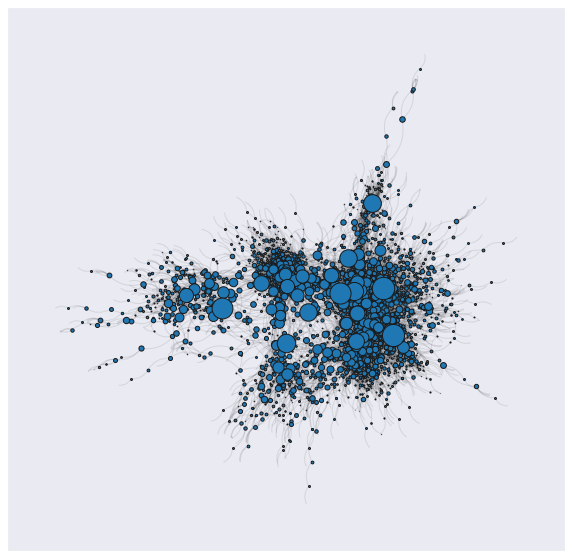

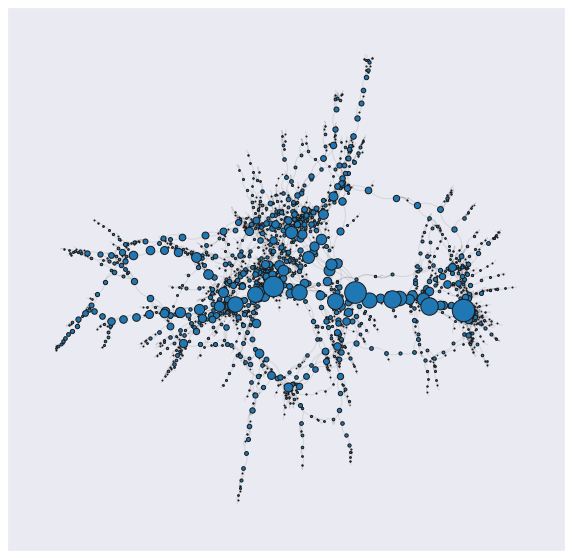

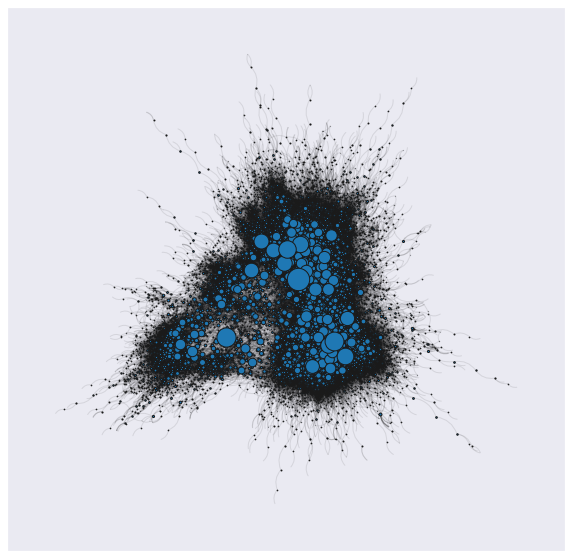

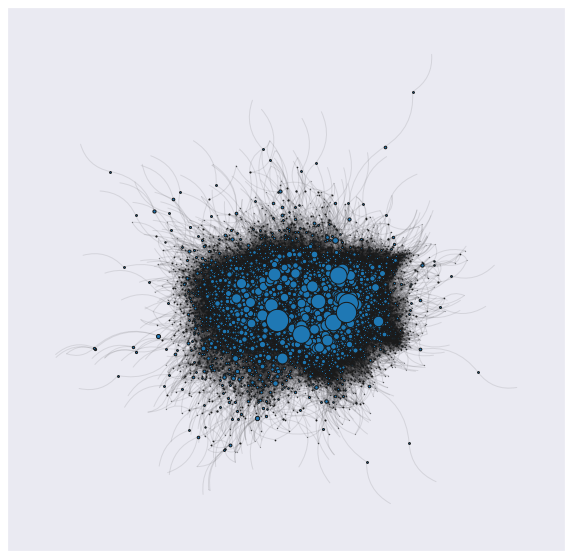

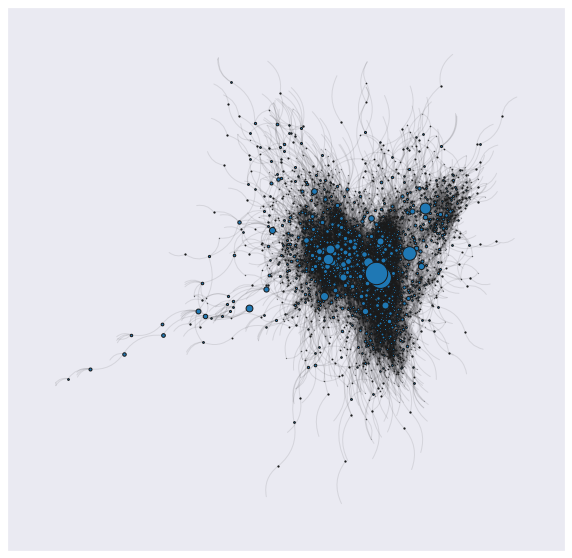

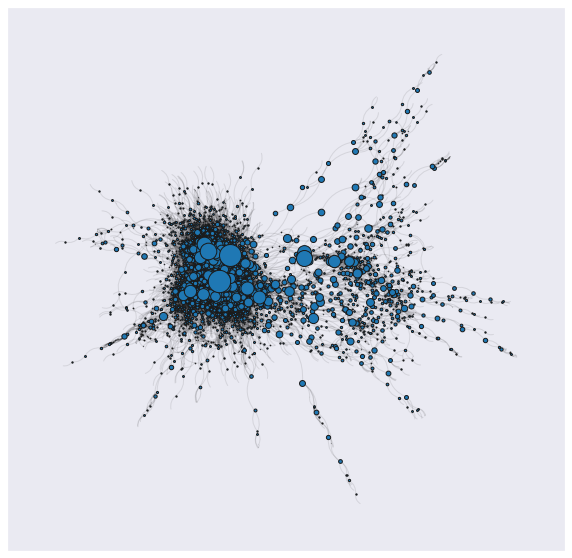

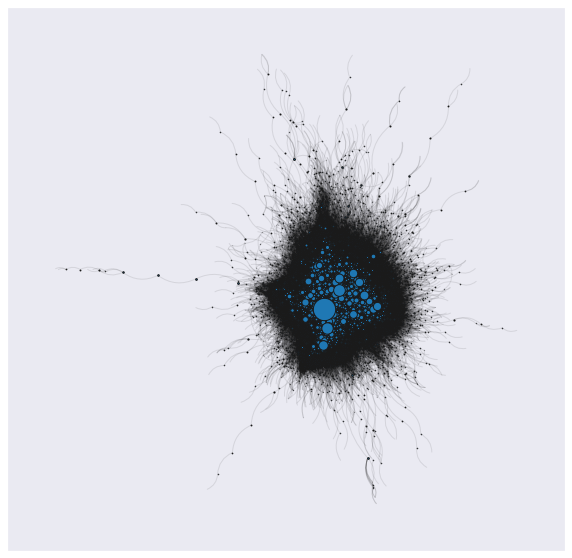

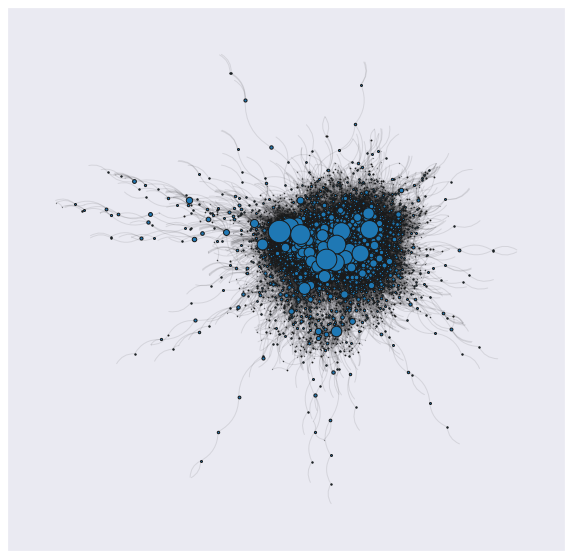

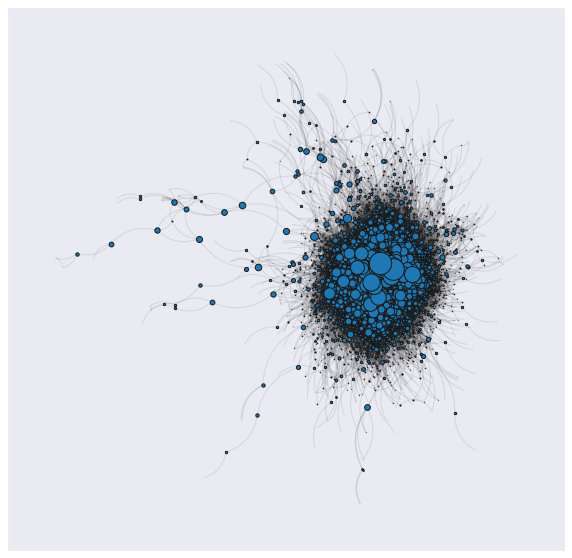

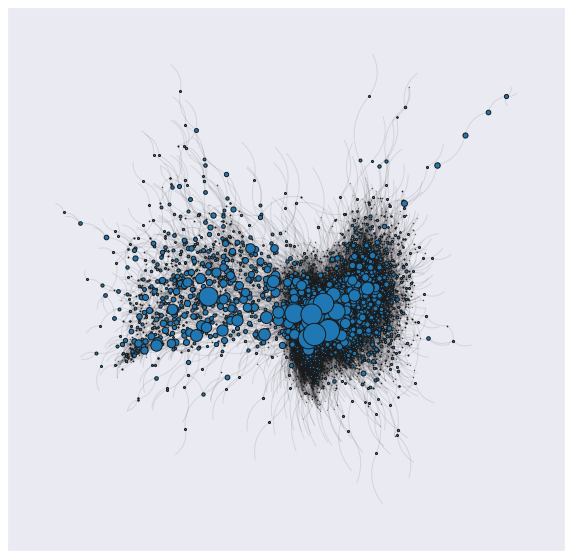

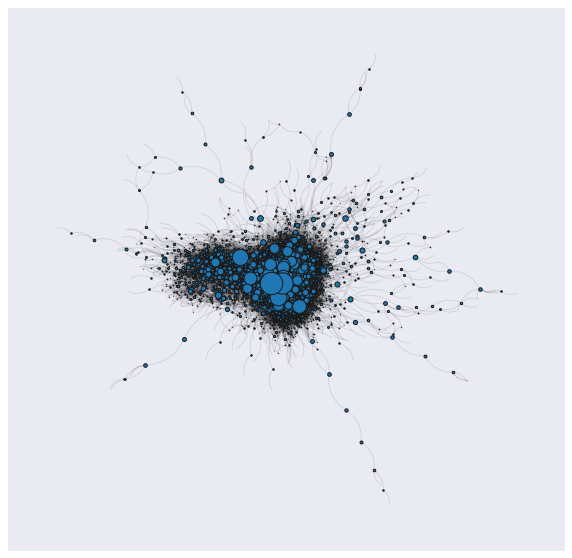

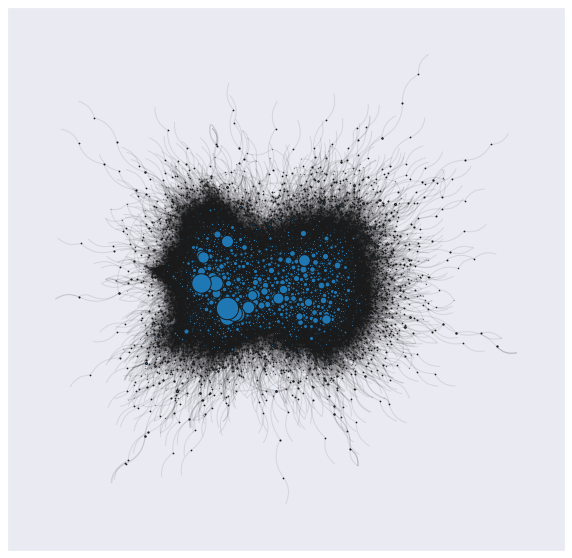

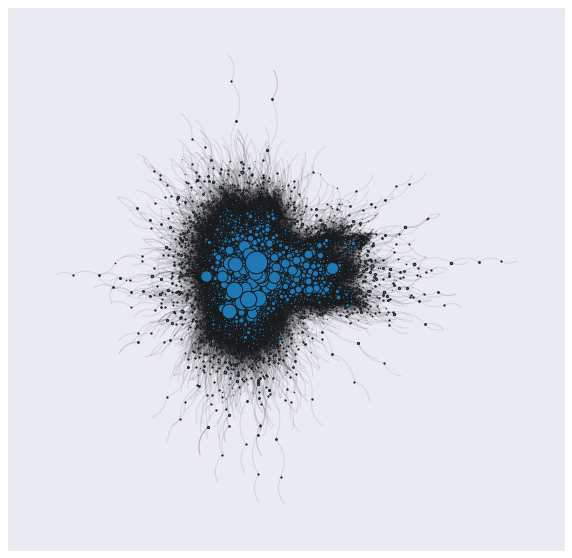

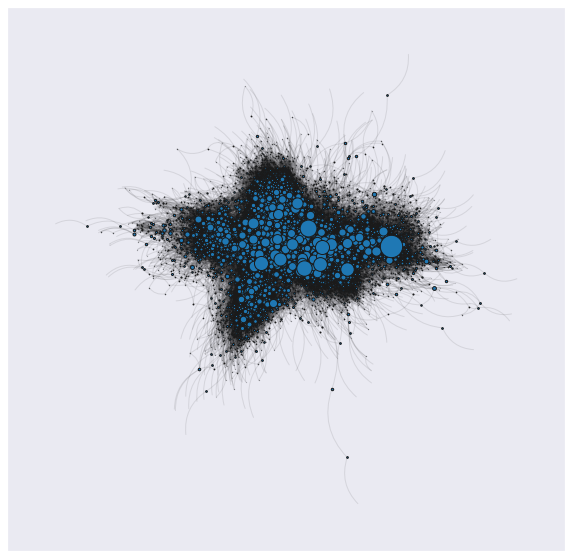

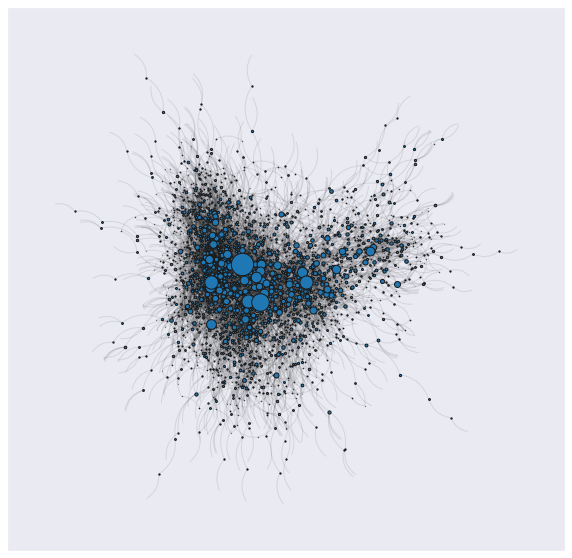

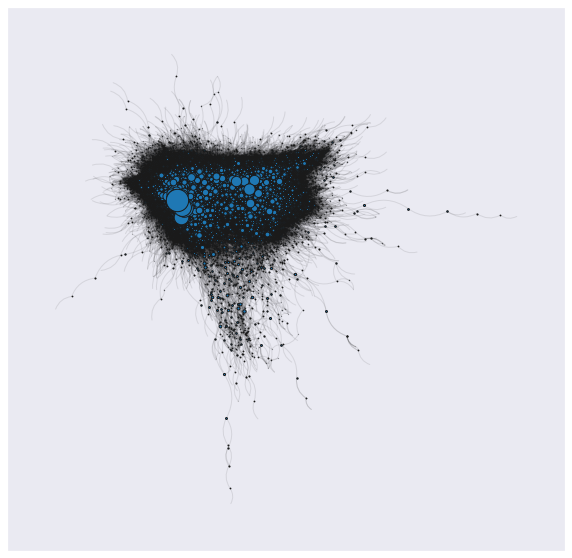

In [3]:
cmap = cm.plasma
node_factor = 500
# n_cols = 2
# n_rows = np.ceil(len(corpora) / n_cols)

sns.set()

for field_name, G in Gs.items():
    fig, ax = plt.subplots(1, figsize=(10, 10))

    print(field_name)

    G = G.to_undirected()
    G = G.subgraph(max(nx.connected_components(G), key=len))
    cent_map = dict(nx.betweenness_centrality(G))

    sorted_cent_map = dict(sorted(cent_map.items(), key=lambda tup: tup[1]))
    node_list = list(sorted_cent_map.keys())
    node_cent = np.fromiter(sorted_cent_map.values(), float)
    normalized_node_map = dict(zip(node_list, node_cent / node_cent.max()))
    normalized_node_list = list(normalized_node_map.keys())
    normalized_node_cent = np.fromiter(normalized_node_map.values(), float)

    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp") # dot, twopi, fdp, sfdp, circo

    for i, (node, cent) in enumerate(normalized_node_map.items()):
        greater_nodes = nx.draw_networkx_nodes(
            G, 
            pos, 
            nodelist=[node],
            node_size=[cent * node_factor],
            # node_color=[cent],
            node_shape='o',
            alpha=1,
            ax=ax,
            cmap=cmap,
            linewidths=1,
            edgecolors='k',
            margins=None,
        ) 
        greater_nodes.set_zorder(i)

    edges = nx.draw_networkx_edges(
        G, 
        pos,
        width=1.0,
        edge_color='k',
        style='solid',
        alpha=0.1, 
        ax=ax,
        arrows=True,
        nodelist=node_list,
        node_size=node_cent * node_factor,
        node_shape='o',
        connectionstyle='arc3, rad=0.3',
    )

    # edges.set_zorder(-1)
    for c in edges:
        c.set_zorder(-1)

    ax.grid(False)

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'citation_graphs', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150 
    )